                                                                                        Daiana Elisabet Paredes

# Análisis de datos de clientes con relación a tarjetas de crédito. 


**Datos para trabajar:** una base de datos que contiene información sobre clientes y tarjetas de crédito. 

Contiene información de facturación, límites, tipo de persona que la posee, estado de pago de la facturación y algunas características de la persona que permiten agruparla en determinado tipo de perfil para asignarle una probabilidad de morosidad alta. 

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('credit_card.csv')
data

,LIMIT_BAL,CHECKING_ACCOUNT,EDUCATION,MARRIAGE,AGE,BILL_AMT,PAY_AMT,DEFAULT
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0
...,...,...,...,...,...,...,...,...
1495,54198,Yes,3.Graduate School,Single,27,295.0780,0.0000,1
1496,45165,No,2.University,Married,55,23637.8555,1144.1800,0
1497,78286,No,3.Graduate School,Single,34,962.9178,962.9178,0
1498,6022,No,2.University,Married,44,864.7592,864.7592,0


In [3]:
data.head()

,LIMIT_BAL,CHECKING_ACCOUNT,EDUCATION,MARRIAGE,AGE,BILL_AMT,PAY_AMT,DEFAULT
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LIMIT_BAL         1500 non-null   int64  
 1   CHECKING_ACCOUNT  1500 non-null   object 
 2   EDUCATION         1500 non-null   object 
 3   MARRIAGE          1500 non-null   object 
 4   AGE               1500 non-null   int64  
 5   BILL_AMT          1500 non-null   float64
 6   PAY_AMT           1500 non-null   float64
 7   DEFAULT           1500 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 93.9+ KB


## **Traducción de variables**

In [5]:
dicc_columnas = {'LIMIT_BAL': 'Límite', 'CHECKING_ACCOUNT':'Cuenta_corriente', 'EDUCATION': 'Escolaridad',
    'MARRIAGE': 'Estado_civil', 'AGE': 'Edad', 'BILL_AMT': 'Valor_factura', 'PAY_AMT': 'Valor_pago', 'DEFAULT': 'Moroso'}

In [6]:
tarjetas = data.rename(columns = dicc_columnas)
tarjetas.head()

,Límite,Cuenta_corriente,Escolaridad,Estado_civil,Edad,Valor_factura,Valor_pago,Moroso
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [7]:
#Transformaciones sobre la variable cuenta corriente
tarjetas['Cuenta_corriente'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
dicc_cuenta = { 'Yes': 'Si', 'No': 'No'}

In [9]:
#Efectuamos los cambios
tarjetas['Cuenta_corriente'].map(dicc_cuenta)

0       Si
1       Si
2       Si
3       Si
4       No
        ..
1495    Si
1496    No
1497    No
1498    No
1499    No
Name: Cuenta_corriente, Length: 1500, dtype: object

In [10]:
tarjetas.head()

,Límite,Cuenta_corriente,Escolaridad,Estado_civil,Edad,Valor_factura,Valor_pago,Moroso
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [11]:
#Transformación variable escolaridad

tarjetas['Escolaridad'].unique()

array(['2.University', '3.Graduate School', '1.High School'], dtype=object)

In [12]:
dicc_escolaridad = { '2.University': '2.Universidad', '3.Graduate School': '3.Graduado', '1.High School': '1.Escuela Secundaria'}

tarjetas['Escolaridad'] = tarjetas['Escolaridad'].map(dicc_escolaridad)

In [13]:
tarjetas.head()

,Límite,Cuenta_corriente,Escolaridad,Estado_civil,Edad,Valor_factura,Valor_pago,Moroso
0,6022,Yes,2.Universidad,Married,24,934.0122,0.0000,1
1,36132,Yes,2.Universidad,Single,26,519.3975,0.0000,1
2,27099,Yes,2.Universidad,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.Universidad,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduado,Single,29,124060.1253,16560.5000,0


In [14]:
#Transformación variable Estado Civil

tarjetas['Estado_civil'].unique()

array(['Married', 'Single'], dtype=object)

In [15]:
dicc_estado_civil = { 'Married': ' Casado', 'Single': 'Soltero'}

tarjetas['Estado_civil'] = tarjetas['Estado_civil'].map(dicc_estado_civil)

In [16]:
tarjetas.head()

,Límite,Cuenta_corriente,Escolaridad,Estado_civil,Edad,Valor_factura,Valor_pago,Moroso
0,6022,Yes,2.Universidad,Casado,24,934.0122,0.0000,1
1,36132,Yes,2.Universidad,Soltero,26,519.3975,0.0000,1
2,27099,Yes,2.Universidad,Soltero,34,4223.5297,457.0698,0
3,15055,Yes,2.Universidad,Casado,37,14522.9563,602.2000,0
4,150550,No,3.Graduado,Soltero,29,124060.1253,16560.5000,0


## **Análisis visuales con Seaborn**

In [17]:
tarjetas.shape

(1500, 8)

### Análisis I

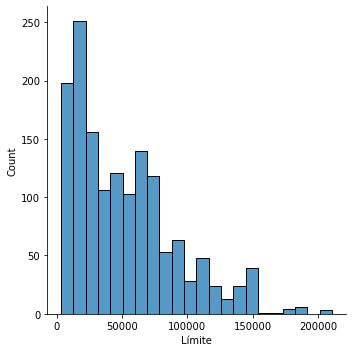

In [36]:
sns.displot(data = tarjetas, x = 'Límite', palette = 'mako')

**Observaciones**: tenemos bastante concentración en valores bajos, se encuentran alrededor de los 20.000 pero también encontramos valores bastante altos de límite de la tarjeta que están por encima de 150.000 o 200.000


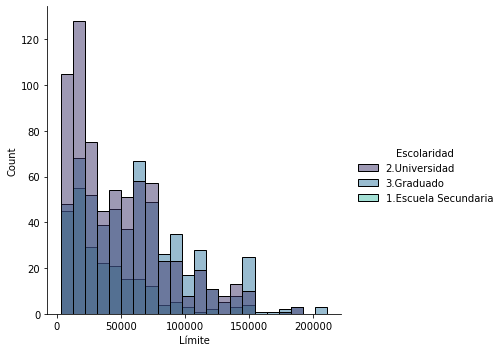

In [35]:
#Analizamos el mismo tipo de variable con relación a la variable escolaridad

sns.displot(data = tarjetas, x = 'Límite', hue = 'Escolaridad', palette = 'mako');

**Observaciones:** notamos que los datos correspondientes a escuela secundaria están concentrados en los valores más bajos, los que son universidad también, pero tienen un poco más de distribución. Los datos que corresponden a graduación tienen picos más altos en los valores de límite muy superior.

### Análisis II

In [20]:
#Creamos una columna que refleja porcentualmente la totalidad de uso del limite disponible utilizado cada persona.
#iu = índice de uso

tarjetas['iu%'] = (tarjetas['Valor_factura'] / tarjetas['Límite'] * 100).round(2)



In [21]:
tarjetas.head()

,Límite,Cuenta_corriente,Escolaridad,Estado_civil,Edad,Valor_factura,Valor_pago,Moroso,iu%
0,6022,Yes,2.Universidad,Casado,24,934.0122,0.0000,1,15.51
1,36132,Yes,2.Universidad,Soltero,26,519.3975,0.0000,1,1.44
2,27099,Yes,2.Universidad,Soltero,34,4223.5297,457.0698,0,15.59
3,15055,Yes,2.Universidad,Casado,37,14522.9563,602.2000,0,96.47
4,150550,No,3.Graduado,Soltero,29,124060.1253,16560.5000,0,82.40


**Observaciones:** vemos que la primera persona usó el 15.5% del total del límite que tiene disponible, la siguiente persona usó bastante poco, sólo el 1% solamente y la cuarta utilizó practicamente todo el límite disponible.


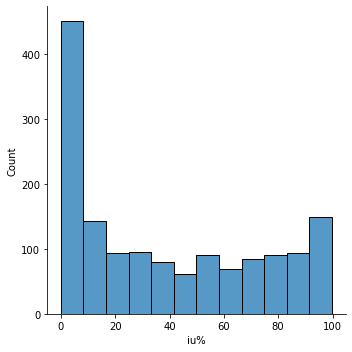

In [34]:
#Observamos gráficamente...

sns.displot(data = tarjetas, x = 'iu%', palette = 'mako');

**Observaciones:** existe una concentración bastante alta en valores bajos, esto significa que las personas usan bastante poco el límite del crédito disponible. Hasta 10% o 15% tenemos también un público un poco alto y tenemos bastantes picos. Entre el 20-80% encontramos valores bastante estables.

**Hay clientes significativos que usan poco del límite que tienen disponible**

## Comparación y análisis de variables categóricas

In [24]:
#Localizamos las variables categóricas en nuestro conjunto de datos (Cuenta_corriente, Escolaridad y Estado_civil)

tarjetas.head()

,Límite,Cuenta_corriente,Escolaridad,Estado_civil,Edad,Valor_factura,Valor_pago,Moroso,iu%
0,6022,Yes,2.Universidad,Casado,24,934.0122,0.0000,1,15.51
1,36132,Yes,2.Universidad,Soltero,26,519.3975,0.0000,1,1.44
2,27099,Yes,2.Universidad,Soltero,34,4223.5297,457.0698,0,15.59
3,15055,Yes,2.Universidad,Casado,37,14522.9563,602.2000,0,96.47
4,150550,No,3.Graduado,Soltero,29,124060.1253,16560.5000,0,82.40


### Análisis de la variable Cuenta_corriente

<AxesSubplot:xlabel='Cuenta_corriente', ylabel='count'>

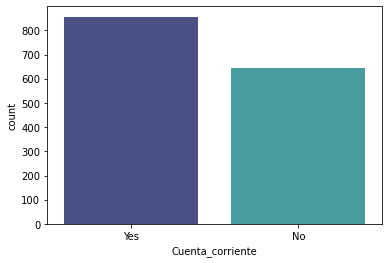

In [33]:
#Análisis de la variable cuenta_corriente. Conteo de la cantidad de personas que tienen cuenta corriente de las que no poseen.

sns.countplot(x = 'Cuenta_corriente', data = tarjetas, palette = 'mako')

**Observaciones:** tenemos más personas que tienen cuenta corriente de las que no tienen. Existen aproximadamente 850 personas con cuenta corriente y alrededor de 650 que no tienene, solo tienen la tarjeta de crédito.

<AxesSubplot:xlabel='Cuenta_corriente', ylabel='count'>

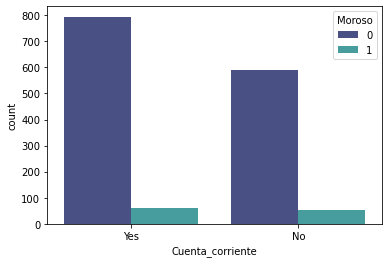

In [32]:
#Evaluamos si los clientes morosos tienen o no cuenta corriente. (Moroso = 1, No moroso = 0)
sns.countplot(x = 'Cuenta_corriente', data = tarjetas, hue = 'Moroso', palette = 'mako')

**Observaciones:** vemos equilibrio en la cantidad de clientes con la condicion de morosidad que posee o no posee cuenta corriente. No obstante, se observa que mayoritariamente las personas con morosidad no tienen cuenta corriente.

### Analisis de la variable estado_civil 

¿Las personas que son casadas tienen más límite que las personas cuyo estado civil es soltero?

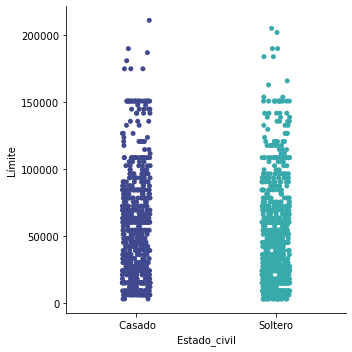

In [37]:
sns.catplot( x = 'Estado_civil', y = 'Límite', data = tarjetas, palette = 'mako');

**Observaciones:** la distribución del límite entre las dos variables es equilibrada.En principio, no hay alguna diferencia significativa entre estas variables. 

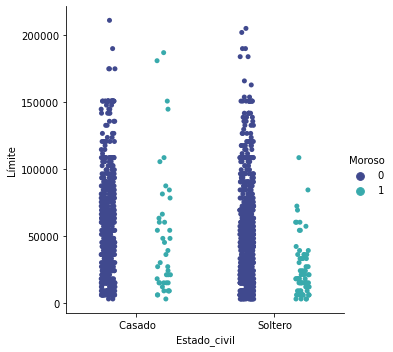

In [38]:
#evaluamos las mismas variables desde la perspectiva de la morosidad en cada uno de estos grupos

sns.catplot( x = 'Estado_civil', y = 'Límite', data = tarjetas, hue = 'Moroso', dodge = True, palette = 'mako');

**Observaciones:** notamos que las personas tienen más límite y morosidad cuando son casadas que cuando son solteras. Las personas morosas y solteras tienen límites más bajos de las que son casadas y morosas.

### Análisis de la variable escolaridad 

¿Será que los clientes, de acuerdo a su nivel de escolaridad, tienen alguna influencia en el valor que las personas gastan con base en el límite total que tienen?

C:\Users\Bailador\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Bailador\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Bailador\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Escolaridad', ylabel='iu%'>

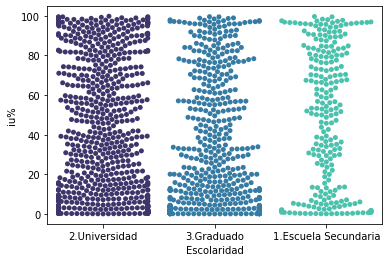

In [41]:
#análisis de esta variable con el indice de uso (iu%)

sns.swarmplot( x = 'Escolaridad', y = 'iu%', data = tarjetas, palette = 'mako')

**Observaciones:**  notamos que de cierta forma las personas que tienen escolaridad "Escuela Secundaria" tienen dos picos significativos: uno muy próximo (cercano a 0) y el otro 1. Los datos de aquellos cuya escolaridad se adjudica en Universidad tienden a estar más distribuídos (entre 0 y 20% tenemos iu bastaste significativo y tambien lo encontramos sobre el 100%) La variable de post-graduación también es un poco parecido al análisis de universidad (tenemos un público significativo de 0 a 20%)

<AxesSubplot:xlabel='Escolaridad', ylabel='iu%'>

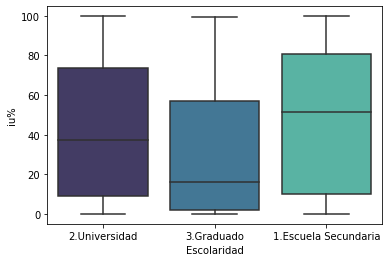

In [44]:
#Observación de las mismas variables con un gráfico boxplot
sns.boxplot( x = 'Escolaridad', y = 'iu%', data = tarjetas, palette = 'mako')

**Observaciones:** Cada grupo tiene valores mínimos y máximos entre 0 y 100%. Analizando los valores de cada media una persona con escolaridad "escuela secundaria" tiene un indice de uso cercano al 60%, los que pertencen a universidad un iu próximo al 40% y los que son graduados cercano al 20%. Destacamos entonces que las personas con un nivel de escolaridad de escuela secundaria, tienen un iu más alto. Además, a medida que aumenta la escolaridad de la persona, su iu, índice de uso, disminuye (tal vez sea porque tenga un límite más alto).

<AxesSubplot:xlabel='Escolaridad', ylabel='iu%'>

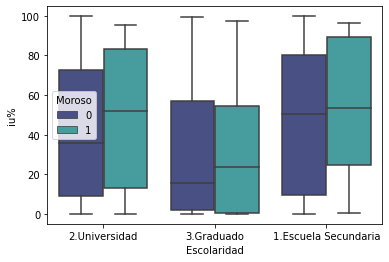

In [46]:
#Realizamos el mismo tipo de análisis pero contrastándolo con el nivel de implicancia de morosidad

sns.boxplot( x = 'Escolaridad', y = 'iu%', data = tarjetas, hue = 'Moroso', palette = 'mako')

**Observaciones:** notamos que las personas morosas tienden a usar más su límite de la tarjeta de crédito. Ademas, observamos que en los grupos de universidad y colegio, el 75% está mucho más arriba de lo que es con los clientes que no son morosos.

In [50]:
#revisamos nuevamente el conjunto de datos
tarjetas.head()

,Límite,Cuenta_corriente,Escolaridad,Estado_civil,Edad,Valor_factura,Valor_pago,Moroso,iu%
0,6022,Yes,2.Universidad,Casado,24,934.0122,0.0000,1,15.51
1,36132,Yes,2.Universidad,Soltero,26,519.3975,0.0000,1,1.44
2,27099,Yes,2.Universidad,Soltero,34,4223.5297,457.0698,0,15.59
3,15055,Yes,2.Universidad,Casado,37,14522.9563,602.2000,0,96.47
4,150550,No,3.Graduado,Soltero,29,124060.1253,16560.5000,0,82.40


In [57]:
#vemos los valores únicos de la columna Edad
tarjetas['Edad'].unique()

array([24, 26, 34, 37, 29, 23, 28, 51, 41, 30, 49, 39, 40, 47, 27, 33, 32,
       54, 58, 22, 31, 25, 42, 45, 57, 56, 44, 35, 53, 43, 38, 63, 36, 52,
       46, 50, 48, 75, 55, 73, 59, 21, 60, 67, 61, 62, 70, 72],
      dtype=int64)

In [58]:
##Creamos una variable categorica para la edad uniéndolas por rangos de edad.
bins = [20, 30, 40, 50, 100]
nombres = ['Rango de 20 a 30', 'Rango de 30 a 40', 'Rango de 40 a 50', 'Mayores de 50']

tarjetas['Rango_Edad'] = pd.cut(tarjetas['Edad'], bins, labels = nombres)

In [59]:
tarjetas.head()

,Límite,Cuenta_corriente,Escolaridad,Estado_civil,Edad,Valor_factura,Valor_pago,Moroso,iu%,Rango_Edad
0,6022,Yes,2.Universidad,Casado,24,934.0122,0.0000,1,15.51,Rango de 20 a 30
1,36132,Yes,2.Universidad,Soltero,26,519.3975,0.0000,1,1.44,Rango de 20 a 30
2,27099,Yes,2.Universidad,Soltero,34,4223.5297,457.0698,0,15.59,Rango de 30 a 40
3,15055,Yes,2.Universidad,Casado,37,14522.9563,602.2000,0,96.47,Rango de 30 a 40
4,150550,No,3.Graduado,Soltero,29,124060.1253,16560.5000,0,82.40,Rango de 20 a 30


<AxesSubplot:xlabel='Rango_Edad', ylabel='Límite'>

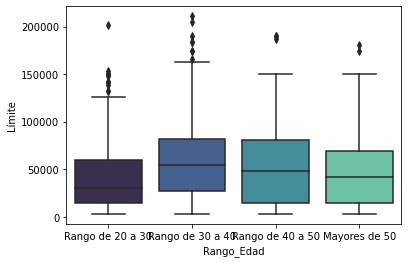

In [60]:
#¿Las personas con mayor edad tienen un límite disponible superior?

sns.boxplot(x = 'Rango_Edad', y = 'Límite', data = tarjetas, palette = 'mako')

**Observaciones:** las personas que tienen más límite disponible son las que están en el rango de edad de 30 a 40, mientras que las personas con menor límite son las que se encuentran en el rango que va desde 20 a 30 años.

El mayor grupo está en el rango de edad de 30 a 40, luego siguen las personas que están en el rango de 40 a 50 y después las personas mayores de 50 años. 

En este gráfico observamos outliers, es decir valores superiores que escapan del flujo normal de los datos. 

## Comparación y análisis de variables numéricas

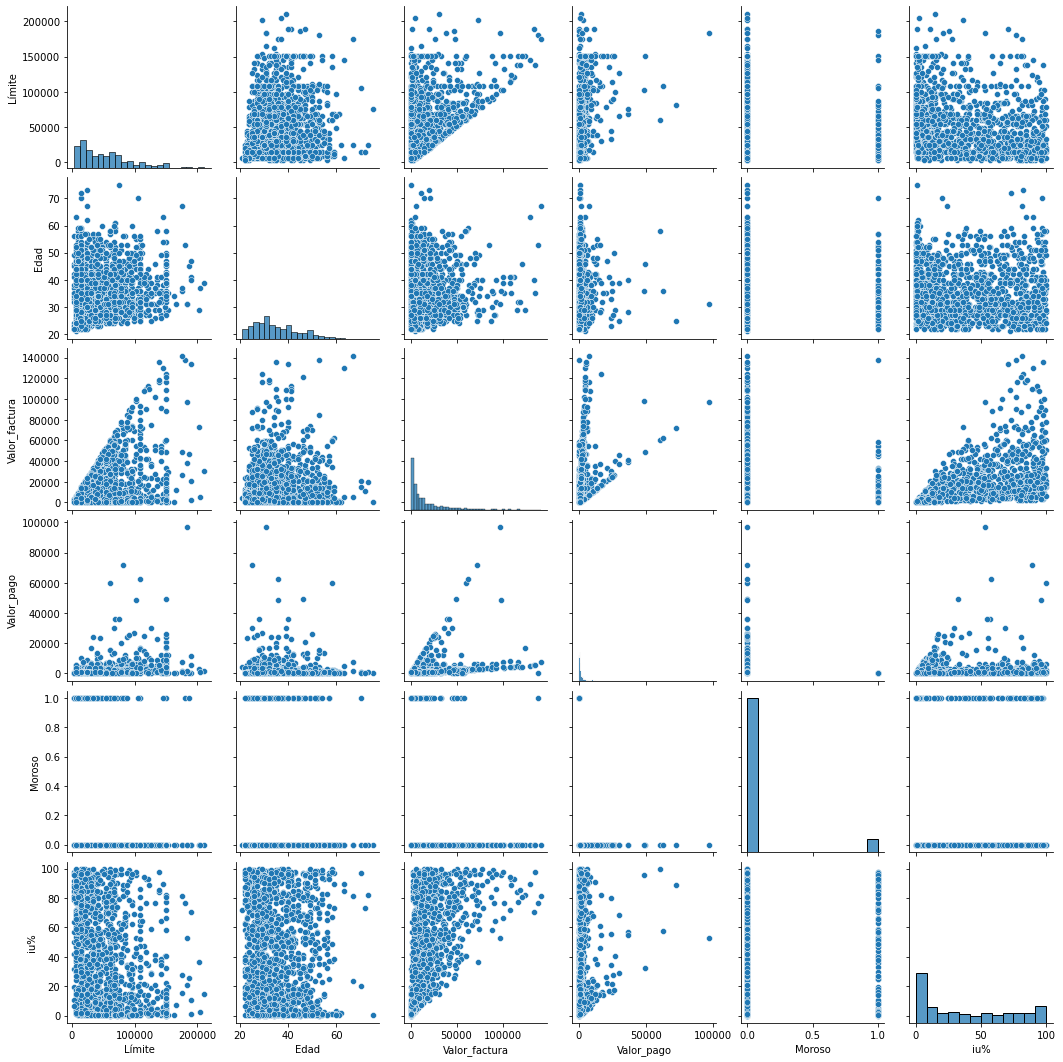

In [121]:
#Hacemos un análisis de estas variables

sns.pairplot(data = tarjetas)

**Observaciones:** en el gráfico podemos visualizar como se relacionan entre sí todas las variables del conjunto de datos que son numéricas. 

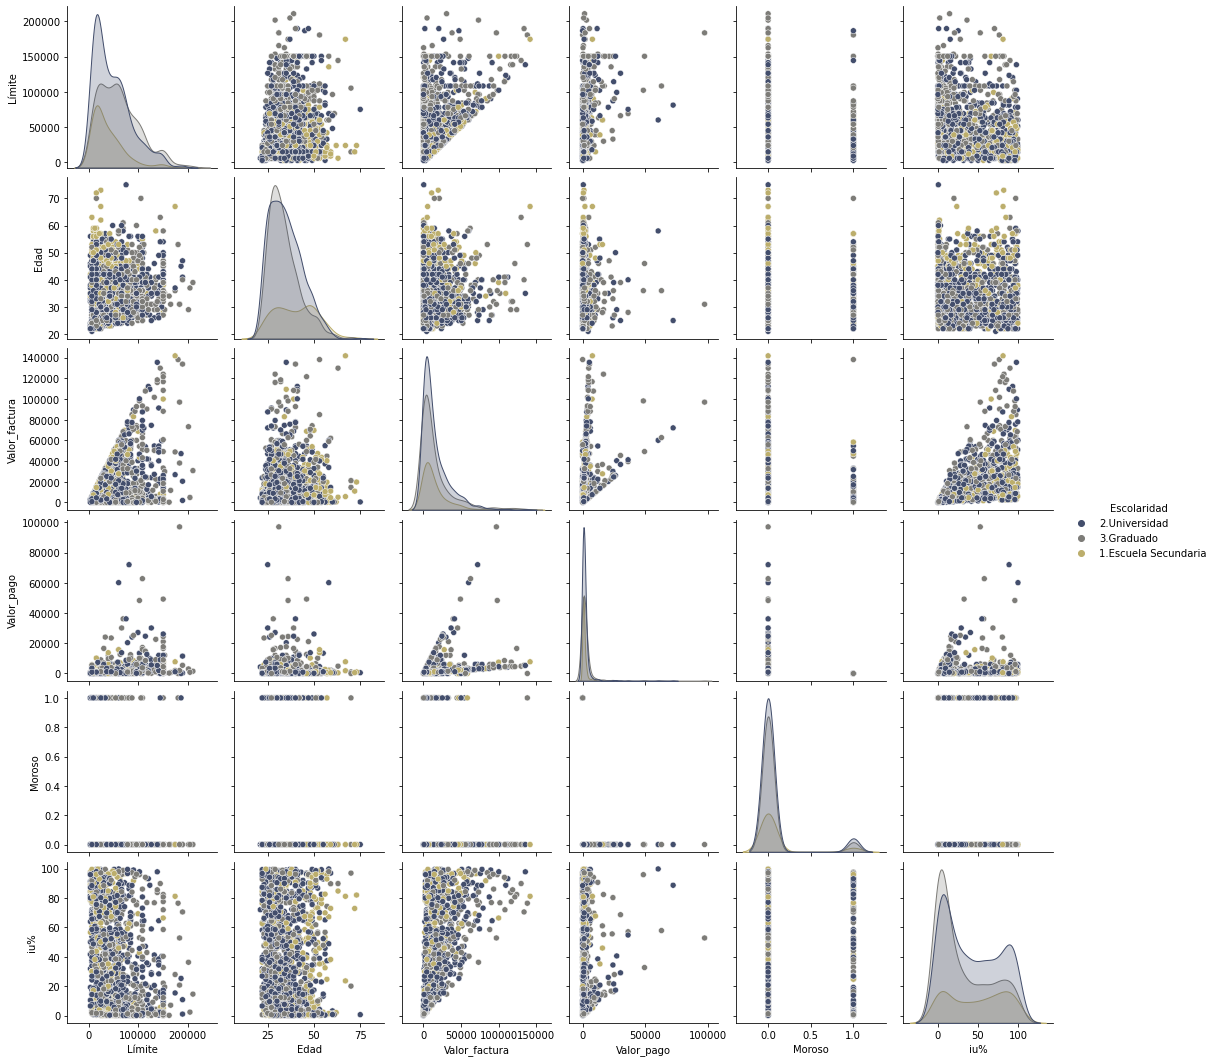

In [122]:
# Analizamos una variable (Escolaridad) con relación a todas las existentes de índole numérica.

sns.pairplot(data = tarjetas, hue = 'Escolaridad', palette = 'cividis')

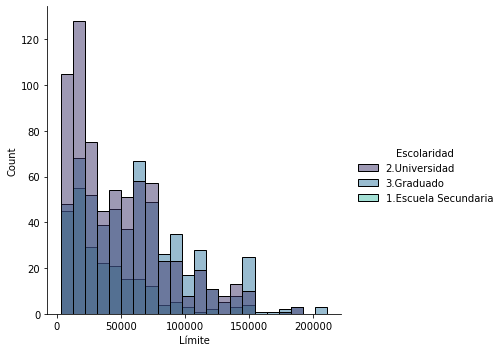

In [123]:
#Analizamos la variable límite con los tipos de escolaridad 
sns.displot(data = tarjetas, x = 'Límite', hue = 'Escolaridad', palette = 'mako');

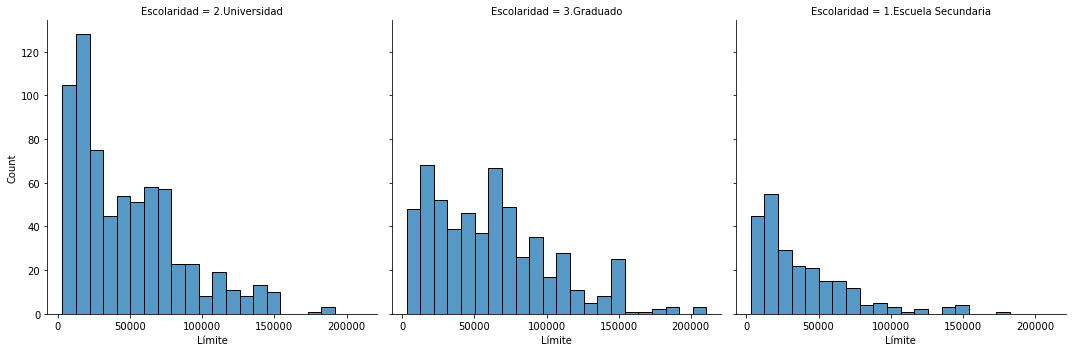

In [68]:
#Separamos los tipos de escolaridad para un mejor entendimiento

sns.displot(data = tarjetas, x = 'Límite', col = 'Escolaridad')

**Observaciones:** 

- Con relación a escuela secundaria encontramos el menor número de clientes con dos picos más elevados en niveles de hasta 20.000 de límite.
- En cuanto a universidad en esos valores encontramos el mayor número de clientes, posee también dos picos bastante altos en valores hasta 20.000.
- Por último, en la condición de graduados hay una distribución más plana con dos picos diferentes, uno alrededor de los 20.000 y otro alrededor de los 60.000


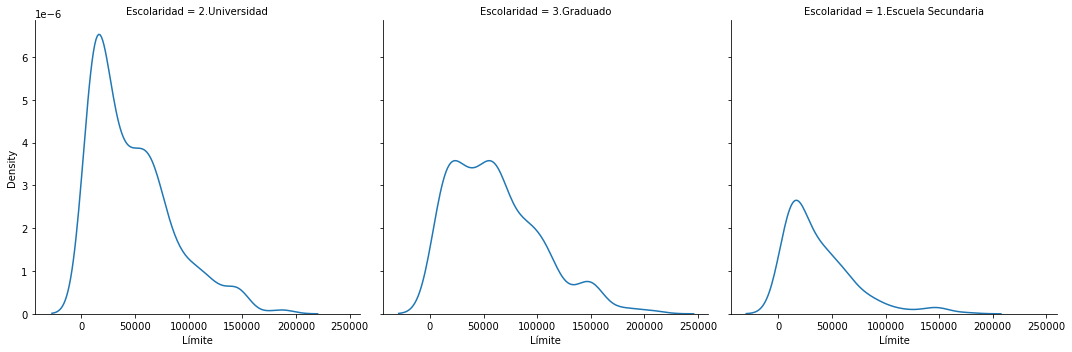

In [74]:
#Observamos con la información de otra manera. Con la función de densidad (kde = kernel density estimation,)
sns.displot(data = tarjetas, x = 'Límite', col = 'Escolaridad', kind ='kde')

#### Agregamos y analizamos que grupo de escolaridad es más moroso y nos preguntamos ¿Cómo se distribuye la morosidad en cada uno de estos grupos?

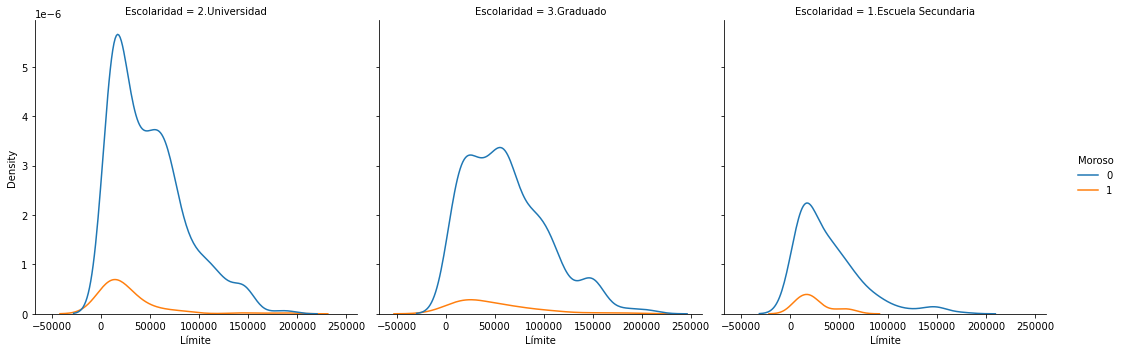

In [75]:
sns.displot(data = tarjetas, x = 'Límite', col = 'Escolaridad', kind ='kde', hue = 'Moroso');

**Observaciones:** en el grupo de escolaridad graduación encontramos que la morosidad es más plana. Los picos más altos están en la escolaridad universidad y escuela secundaria, siendo el más alto en universidad. 

La distribución llega a valores bastante altos, los morosos a más de 200.000. En el nivel de escuela secundaria los clientes no tienen tanto límite (alrededor de 100.000), y tienen un pico también bastante alto comparado con el pico de los clientes no morosos.

### Generamos un gráfico de dispersión sobre algunas variables

<AxesSubplot:xlabel='iu%', ylabel='Valor_factura'>

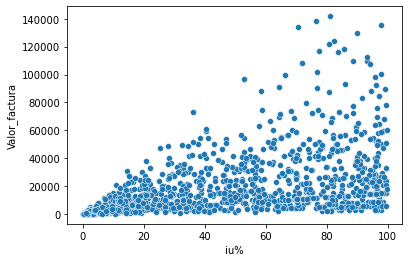

In [79]:
sns.scatterplot(x = 'iu%', y = 'Valor_factura', data = tarjetas)

**Observaciones:**  vemos una relación que es directamente proporcional, a medida que aumenta el valor de la factura aumenta también el índice de uso. Observamos que los clientes tienen un valor de factura bastante alto (gastaron prácticamente todo el límite que tenían disponible).

También existen concentraciones bastantes altas de personas que tienen un límite, un valor de factura bajo y un índice de uso bastante bajo. 

<AxesSubplot:xlabel='iu%', ylabel='Valor_factura'>

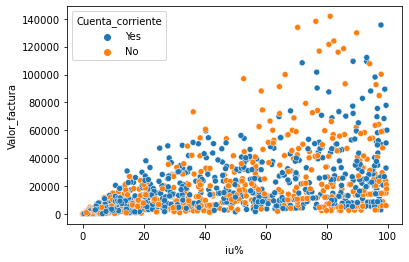

In [81]:
#Vemos como se relacionan las variables utilizadas con la variable cuenta_corriente 
sns.scatterplot(x = 'iu%', y = 'Valor_factura', data = tarjetas, hue = 'Cuenta_corriente')

**Observaciones:** notamos que las personas que no tienen cuenta corriente, tienen números más altos de índice de uso, principalmente los valores de factura más altos.

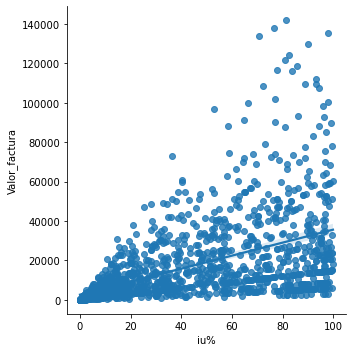

In [83]:
#Generamos una grafica de regresión que nos permita observar como es la relación entre las variables analizadas anteriormente

sns.lmplot(x= 'iu%', y= 'Valor_factura', data = tarjetas)

**Observaciones:** en este grafico observamos la línea de tendencia. Vemos que la relación dentre las dos variables es proporcional. 

## Test de hipótesis sobre la variable morosidad

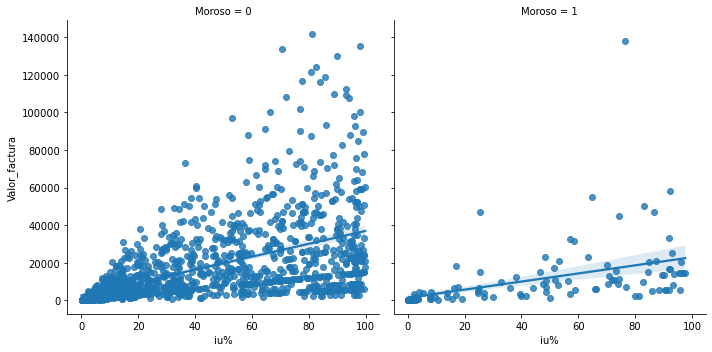

In [89]:
sns.lmplot(x= 'iu%', y= 'Valor_factura', data = tarjetas, col = 'Moroso')

**Observaciones:** la línea de regresión es positiva, es directamente proporcional en los dos casos pero su inclinación es diferente.


#### ¿Esta diferencia en la inclinación es estadísticamente significativa?

Tener en cuenta: 

**H<sup>null<sup>** --> la distribución de los grupos moroso y no moroso es la misma.
    
**H<sup>alt<sup>** --> la distribución de los grupos moroso y no moroso NO es la misma.

In [90]:
from scipy.stats import ranksums

In [96]:
#Grupo de morosos. Hacemos uso de una query.

moroso = tarjetas.query('Moroso == 1')['Valor_factura']
moroso

0         934.0122
1         519.3975
38      10891.0881
45        330.6078
47       7316.7300
           ...    
1448     1619.0147
1472    17048.2820
1475     4402.0820
1478     1851.1628
1495      295.0780
Name: Valor_factura, Length: 117, dtype: float64

In [97]:
#Tenemos en total 117 clientes que son morosos
moroso.count()

117

In [98]:
#Grupo de no morosos
no_moroso = tarjetas.query('Moroso == 0').Valor_factura
no_moroso

2         4223.5297
3        14522.9563
4       124060.1253
5          114.4180
6         4244.3056
           ...     
1494     32698.2556
1496     23637.8555
1497       962.9178
1498       864.7592
1499     97022.8508
Name: Valor_factura, Length: 1383, dtype: float64

In [100]:
#Tenemos un total de 1383 clientes que no son morosos
no_moroso.count()

1383

In [110]:
#Ahora, vemos si en estos dos grupos (moroso y no moroso) la diferencia en la distribución es estadísticamente significativa

resultado = ranksums(moroso, no_moroso)

print(f'El p_value de nuestro test es {resultado.pvalue}')

El p_value de nuestro test es 0.010391243081223555


**Observaciones:** el p-value es de 1% (0.01). Los valores por debajo de 5% sirven para aceptar la hipótesis alternativa ya que la distribución entre los grupos moroso y no_moroso no es la misma, por lo tanto la diferencia en la distribución es significativa en términos estadísticos. 

### Más análisis sobre variables numéricas

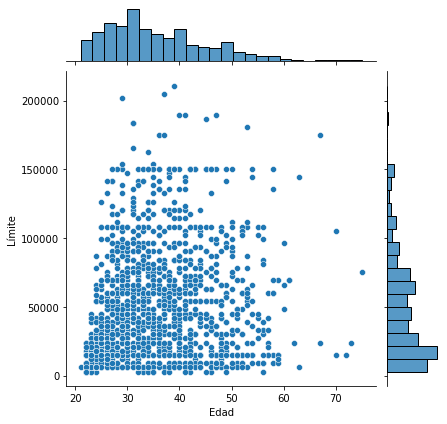

In [112]:
#Relacionamos la variable edad con el límite

sns.jointplot(data = tarjetas, x = 'Edad', y = 'Límite')

**Observaciones:** notamos la dispersión de los datos al compararlos con las variables de límite y edad, incluyendo este gráfico un histograma que nos permite ver la frecuencia de los datos. 
    
La edad tiene una concentración alta alrededor de los 30 años pero también hay clientes significativos que tienen entre 20 y 30 años.  Con respecto al límite, vemos picos altos en valores bajos del mismo. 

Se aprecia que no existe una correlación lo suficientemente significativa, no obstante ello se observa una relación proporcional. 

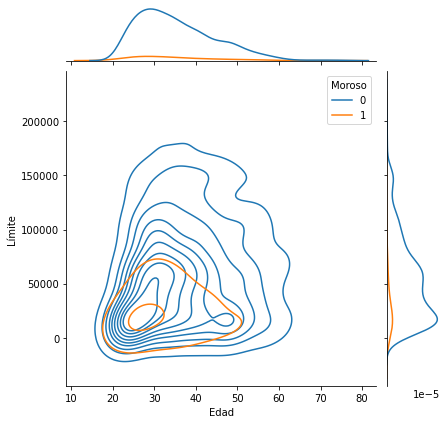

In [116]:
#Visualizamos las variables de otra manera, con un gráfico de intensidad y en contraste con la variable morosidad

sns.jointplot(data = tarjetas, x = 'Edad', y = 'Límite', kind = 'kde', hue = 'Moroso')

**Observaciones:** el grupo moroso tiene una concentración de clientes con edades que se encuentran entre los 20 y 30 años con límites bajos y un poco más dispersos. El grupo no moroso tiene una distribución más amplia.